In [98]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from bullinger import chronogram
from bullinger import cohort
from bullinger import intervals
from bullinger import plot
from bullinger import video

intervals = importlib.reload(intervals)
video = importlib.reload(video)
chronogram = importlib.reload(chronogram)
cohort = importlib.reload(cohort)
plot = importlib.reload(plot)

In [63]:
folder = '/home/olivier/dev/data/laura_codage/'
c = cohort.Cohort(folder, num_workers=20)

In [67]:
print(c.num_annotations, 'annotations in', len(c), 'videos' )

3320 annotations in 196 videos


In [68]:
c.summary

video_id  baby  duration
semester group                          
1.0      AD           52    10  5366.159
         TD           49    10  4726.794
2.0      AD           46    10  4780.752
         TD           47    10  3844.420

In [70]:
df = c.aggregate(lambda v: v.summary)
df

duration           stimulation            response          
                      mean       sem        mean       sem      mean       sem
semester group                                                                
1.0      AD     101.849635  4.263168    0.441683  0.040955  0.149508  0.027654
         TD      93.470220  3.917274    0.520146  0.040161  0.310798  0.046116
2.0      AD     100.790000  4.464595    0.496069  0.048292  0.211734  0.032572
         TD      81.190894  3.649250    0.547248  0.044832  0.449333  0.047502

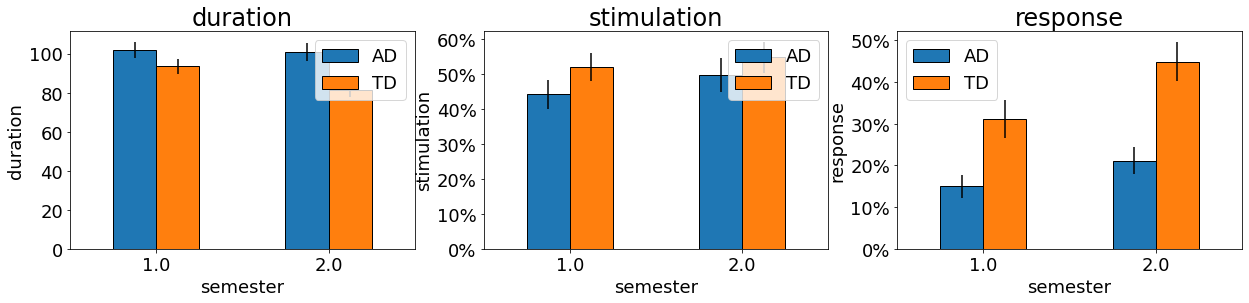

In [78]:
fig, axes = plt.subplots(1, 3, figsize=(21, 4))
plot.plot_agg(df, metric='duration', ax=axes[0])
plot.plot_agg(df, metric='stimulation', ax=axes[1])
plot.plot_agg(df, metric='response', ax=axes[2])

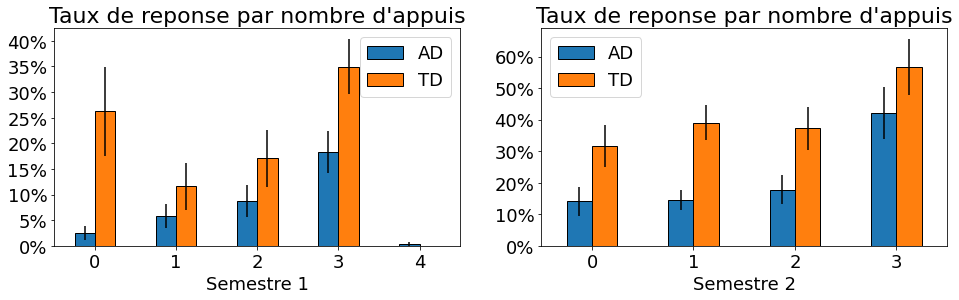

In [138]:
plot = importlib.reload(plot)
def supports_fn(v):
    return pd.pivot_table(v.responses_per(groupby='num_supports'), 'relative', index='num_supports').transpose().iloc[0]

# fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes = plot.plot_per_semester(c.aggregate(supports_fn), axes=axes, rot=0)
for ax in axes:
    ax.set_title('Taux de reponse par nombre d\'appuis', fontsize=22)

In [86]:
def full_supports_fn(v):
    return pd.pivot_table(v.responses_per(groupby='context'), 'relative', index='context').transpose().iloc[0]

df = c.aggregate(full_supports_fn).dropna(axis=1)

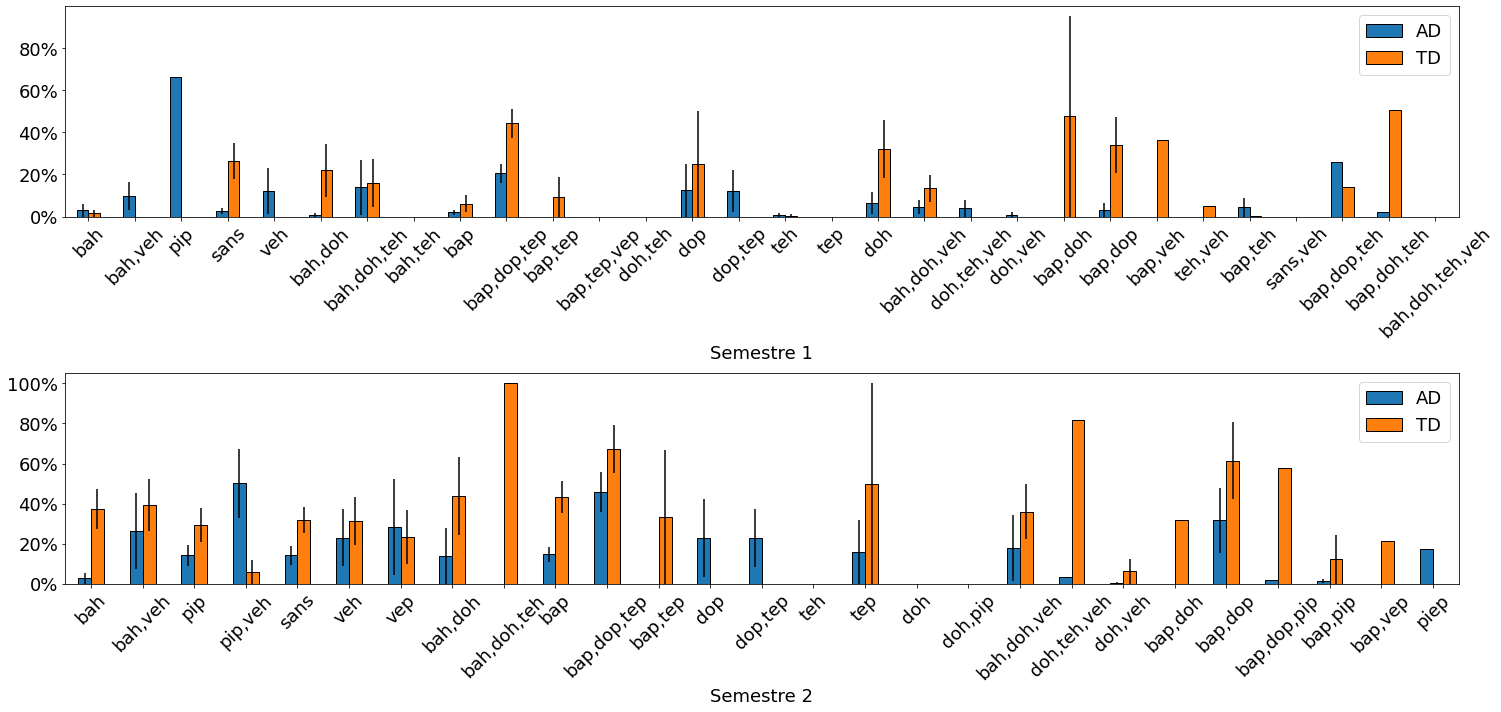

In [111]:
plot = importlib.reload(plot)
fig, axes = plt.subplots(2, 1, figsize=(21, 10))
plot.plot_per_semester(df, axes=axes, rot=45)
plt.tight_layout()

<AxesSubplot:title={'center':'invisible'}, xlabel='semester', ylabel='invisible'>

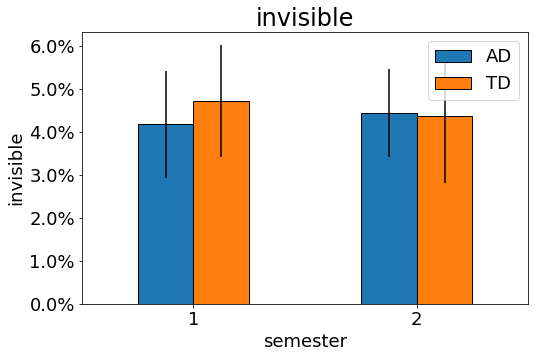

In [130]:
plot = importlib.reload(plot)
def invisible_time(v):
    return pd.Series({'invisible': v.df[v.df.tag == 'inv'].duration.sum() / v.duration})
    
plot.plot_agg(c.aggregate(invisible_time), 'invisible', rot=0)

# df = c.aggregate(invisible_time)
# df = pd.pivot_table(df, values='invisible', index=df.index.names[0], columns=[df.index.names[1]])
# aggfuncs = df.columns.get_level_values(0).unique()
# mu = df.loc[:, df.columns.get_level_values(0)==aggfuncs[0]]
# err = df.loc[:, df.columns.get_level_values(0)==aggfuncs[1]]
# mu.columns = mu.columns.get_level_values(1)
# err.columns = err.columns.get_level_values(1)
# mu.index.dtype == float
# # (mu.index.astype(int).values - mu.index.values).sum()